In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from scipy.signal import find_peaks_cwt
import os

%matplotlib inline

In [2]:
distortion = pickle.load( open( "distort.p", "rb" ) )
mtx, dist = distortion["mtx"], distortion["dist"]

In [3]:
four = mpimg.imread(os.path.join("test_images", "test4.jpg"))
one = mpimg.imread(os.path.join("test_images", "test1.jpg"))
two = mpimg.imread(os.path.join("test_images", "test2.jpg"))
three = mpimg.imread(os.path.join("test_images", "test3.jpg"))
five = mpimg.imread(os.path.join("test_images", "test5.jpg"))
sixx = mpimg.imread(os.path.join("test_images", "test6.jpg"))
thirtysix  = mpimg.imread("636.jpg")
img_size = [one.shape[0], one.shape[1]]

zeroone  = mpimg.imread("zero.jpg")
zerotwo  = mpimg.imread("zero2.jpg")
zerothree  = mpimg.imread("zero1.jpg")


In [4]:
def hlsMask(img):
    imageHLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    S = imageHLS[:, :, 2]

    thresh = (150, 255)
    Sbinary = np.zeros_like(S)
    Sbinary[(S >= thresh[0]) & (S <= thresh[1])] = 1
    return Sbinary

def lMask(img):
    imageHLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    L = imageHLS[:, :, 1]

    thresh = (150, 255)
    Lbinary = np.zeros_like(L)
    Lbinary[(L > thresh[0]) & (L <= thresh[1])] = 1
    return Lbinary

def hsvMask(img):
    imageHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    V = imageHSV[:, :, 2]

    thresh = (160, 255)
    Vbinary = np.zeros_like(V)
    Vbinary[(V > thresh[0]) & (V <= thresh[1])] = 1
    return Vbinary

def rMask(img):

    R = img[:, :, 0]

    thresh = (220, 255)
    Rbinary = np.zeros_like(R)
    Rbinary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return Rbinary


def LandS(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    G = hlsMask(img)
    R = lMask(img)
    binary[(G == 1) & (R == 1)] = 1
    return binary

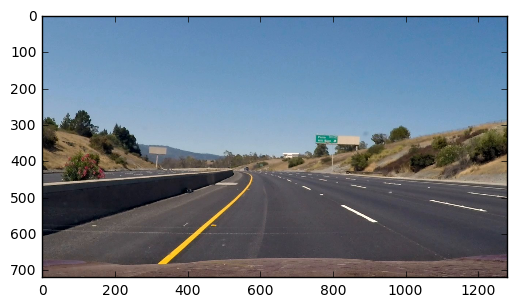

In [5]:
plt.imshow(zeroone)

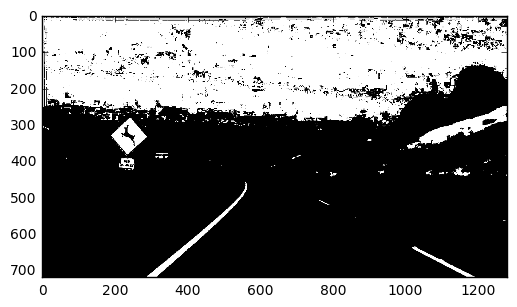

In [236]:
plt.imshow(LandS(four), cmap='gray')

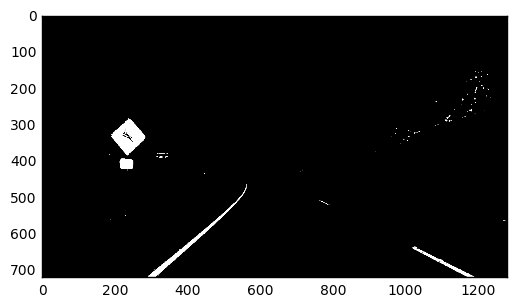

In [7]:
plt.imshow(hlsMask(four), cmap='gray')

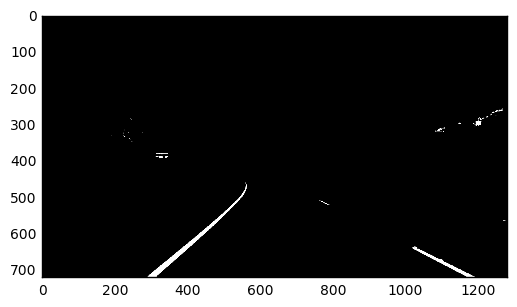

In [158]:
plt.imshow(LandS(four), cmap='gray')

In [6]:
def van(img):
    hthresh = [160, 190]
    lthresh = [5, 10]
    sthresh = [160, 200]
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    binary = np.zeros_like(S)
    hbinary = np.zeros_like(S)
    sbinary = np.zeros_like(S)
    lbinary = np.zeros_like(S)
    hbinary[(H <= hthresh[1]) & (H >= hthresh[0])] = 1
    sbinary[(S <= lthresh[1]) & (S >= lthresh[0])] = 1
    lbinary[(L <= sthresh[1]) & (L >= sthresh[0])] = 1
    binary[(hbinary == 1) & (sbinary == 1) & (lbinary == 1)] = 1
    return binary

In [7]:
def bMask(img):

    R = img[:, :, 2]

    thresh = (180, 255)
    Rbinary = np.zeros_like(R)
    Rbinary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return Rbinary

def gMask(img):

    R = img[:, :, 1]

    thresh = (180, 255)
    Rbinary = np.zeros_like(R)
    Rbinary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return Rbinary

def hMask(img):
    
    imageHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    H = imageHSV[:, :, 0]

    thresh = (150, 255)
    Rbinary = np.zeros((H.shape))
    Rbinary[(H > thresh[0]) & (H <= thresh[1])] = 1
    return Rbinary

In [8]:
def GandR(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    G = gMask(img)
    R = hsvMask(img)
    binary[(G == 1) & (R == 1)] = 1
    return binary

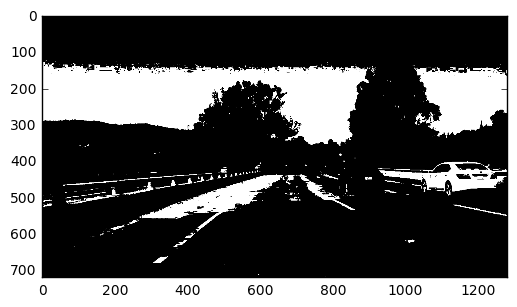

In [11]:
plt.imshow(GandR(four), cmap='gray')

In [9]:


def yMask(img):

    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y = img[:, :, 0]

    thresh = (230, 250)
    ybinary = np.zeros_like(Y)
    ybinary[(Y > thresh[0]) & (Y <= thresh[1])] = 1
    return ybinary

def uMask(img):

    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y = img[:, :, 1]

    thresh = (200, 250)
    ybinary = np.zeros_like(Y)
    ybinary[(Y > thresh[0]) & (Y <= thresh[1])] = 1
    return ybinary

def YandU(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    G = yMask(img)
    R = uMask(img)
    binary[(G == 1) & (R == 1)] = 1
    return binary

In [10]:
def VandRandS(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    S = hlsMask(img)
    V = hsvMask(img)
    R = rMask(img)
    binary[(V == 1) & (R == 1) & (S == 1)] = 1
    return binary

def HandU(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    G = uMask(img)
    R = hsvMask(img)
    binary[(G == 1) & (R == 1)] = 1
    return binary

def RandHsvandu(img):
    binary = np.zeros((img.shape))
    binary = binary.mean(2)
    S = uMask(img)
    V = hsvMask(img)
    R = rMask(img)
    binary[(V == 1) & (R == 1) & (S == 1)] = 1
    return binary

In [11]:
def superStack(img):
    GR = RandHsvandu(img)
    VRS = VandRandS(img)
    B = HandU(img)
    color_binary = np.dstack((GR, VRS,  B)).astype(float)
    return color_binary

def grayify(img):
    img = img.mean(2)
    binary = np.zeros((img.shape))
    binary[(img > 0)] = 1
    return binary

In [12]:
def abs_sobel_thresh(img, orient='x', thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    x, y = None, None
    
    if orient == "x":
        x, y = 1, 0
    else:
        x, y = 0, 1
        
    sobelxy = cv2.Sobel(gray, cv2.CV_64F, x, y)
    
    sobelxy = np.absolute(sobelxy)
    
    scaled_sobel = np.uint8(255*sobelxy/np.max(sobelxy))
    
    sxbinary = np.zeros_like(scaled_sobel)
    
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    grad_binary = sxbinary
    
    return grad_binary


def sobel_combine(img):
# Choose a Sobel kernel size
    ksize = 5# Choose a larger odd number to smooth gradient measurements

    blurImg = img
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(blurImg, orient='x', thresh=(25, 205))
    grady = abs_sobel_thresh(blurImg, orient='y', thresh=(25, 205))
    binary = cv2.bitwise_and(gradx, grady)
    return binary



def combined_threshold(img, ksize=3):
    color_binary = LandS(img)
    sobel_binary = sobel_combine(img)
    b = bMask(img)
    r = rMask(img)
    u = uMask(img)
    y = yMask(img)
    v = van(img)
    binary = np.zeros_like(sobel_binary)
    binary[(color_binary == 1) | (sobel_binary == 1) | ((b == 1) & (r == 1)) | (u == 1) | (y == 1) | (v == 1)] = 1
    blur = gaussian_blur(binary)
    return blur

In [15]:
LandS(four).shape, sobel_combine(four).shape

((720, 1280), (720, 1280))

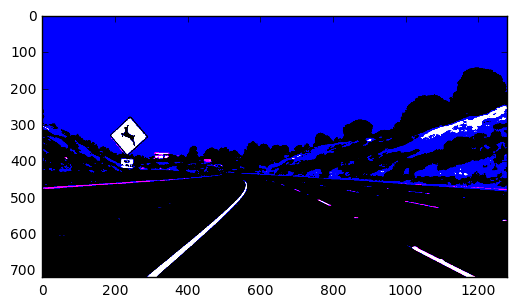

In [334]:
plt.imshow(superStack(four))

In [112]:
four.shape

(720, 1280, 3)

In [15]:

def gaussian_blur(img, kernel=7):
    blur = cv2.GaussianBlur(img,(kernel,kernel),0)
    return blur


def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)


def threshold_pipeline(img):
    img = undistort(img)
    img = gaussian_blur(img, kernel=5)
    img = superStack(img).mean(2)
    return img

#dst = np.float32([[240,719],[1040,719],[1040,300],[240,300]])

#src = np.float32([[220,719],[1220,719],[750,480],[550,480]])  


src = np.float32([[cbl_window,hb_window],[cbr_window,hb_window],[ctr_window,ht_window],[ctl_window,ht_window]])

dst = np.float32([[0,img_size[0]],[img_size[1],img_size[0]],
                  [img_size[1],0],[0,0]])

src = np.float32([[490, 482],[810, 482],
                  [1250, 720],[40, 720]])
dst = np.float32([[0, 0], [1280, 0], 
                 [1250, 720],[40, 720]])

src = np.float32([[543,458],[720,460],[1233,710],[193,712]])

dst = np.float32([[100,100],[1100,100],[1100,550],[100,550]])

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

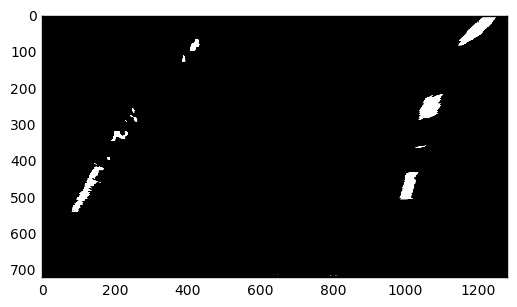

In [37]:
image = mpimg.imread(os.path.join("test_images", "test5.jpg"))
im = warp((combined_threshold(image)))
plt.imshow(im, cmap='gray')

In [147]:
plt.imsave("image.jpg", im, cmap='gray')    
blur = gaussian_blur(binary)

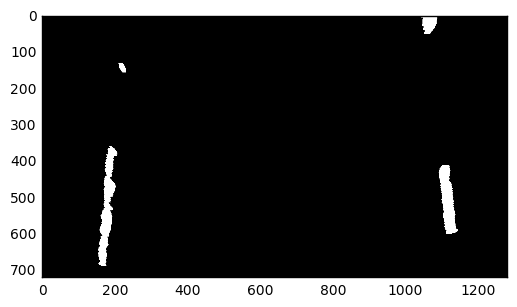

In [374]:
blur = warp(combined_threshold(image))
plt.imshow(blur, cmap='gray')

C:\Users\sijuade\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


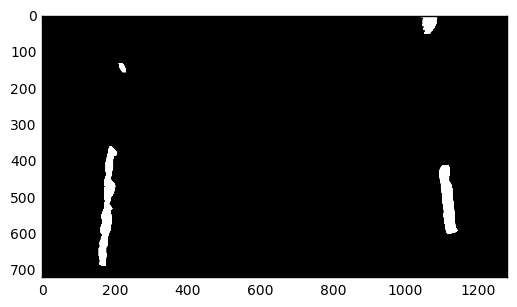

In [375]:
blur = warp(combined_threshold(image))
blur[blur.shape[0]/2:, :] = gaussian_blur(blur[blur.shape[0]/2:, :])
plt.imshow(blur, cmap='gray')

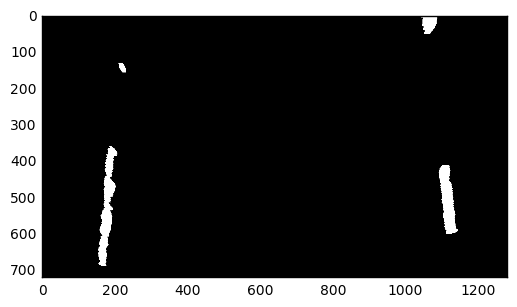

In [376]:
plt.imshow(warp(combined_threshold(image)), cmap='gray')

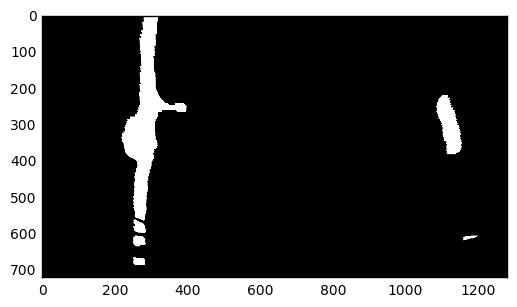

In [377]:

plt.imshow(warp(combined_threshold(four)), cmap='gray')

In [14]:
ht_window = np.uint(img_size[0]/1.5)
hb_window = np.uint(img_size[0])
c_window = np.uint(img_size[1]/2)
ctl_window = c_window - .2*np.uint(img_size[1]/2)
ctr_window = c_window + .2*np.uint(img_size[1]/2)
cbl_window = c_window - 1*np.uint(img_size[1]/2)
cbr_window = c_window + 1*np.uint(img_size[1]/2)

In [736]:
src, dst

(array([[    0.,   720.],
        [ 1280.,   720.],
        [  768.,   480.],
        [  512.,   480.]], dtype=float32), array([[    0.,   720.],
        [ 1280.,   720.],
        [ 1280.,     0.],
        [    0.,     0.]], dtype=float32))

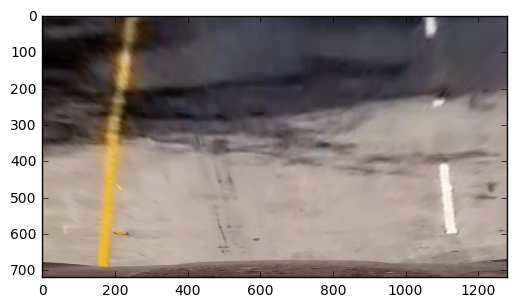

In [378]:
plt.imshow(warp(image))

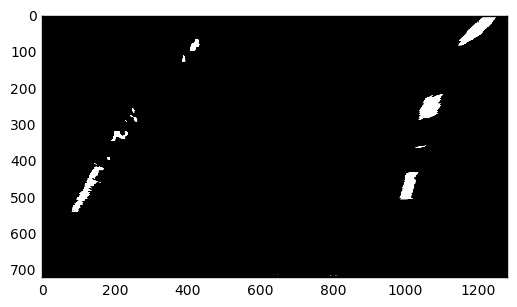

In [17]:
plt.imshow(im, cmap='gray')

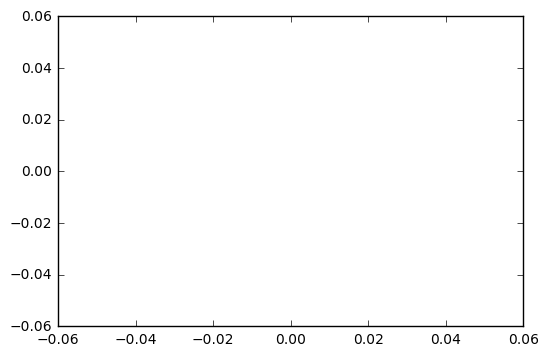

In [17]:
histogram = np.sum(im[:,1280:1400], axis=0)
plt.plot(histogram)

In [18]:
np.argmax(histogram)

ValueError: attempt to get argmax of an empty sequence

In [22]:
if histogram.tolist() != []:
    print("histogram")
else:
    print("no")

no


[]

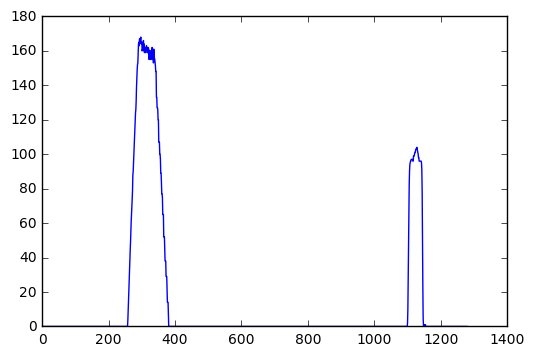

In [776]:
histogram = np.sum(im[im.shape[0]/2:,:], axis=0)
plt.plot(histogram)

In [777]:
peaks = find_peaks_cwt(histogram, np.arange(200, 300))
peaks

[317, 1125]

In [798]:

breaks = 10
ratio = int(img_size[0] / breaks)
imageFrac = []

for i in range(breaks):
    imageFrac.append(im[ratio*i:(i+1)*ratio, :])

In [804]:
rPoints = []
lPoints = []
for i in range(breaks):
    left, right = None, None
    peaks = find_peaks_cwt(np.sum(imageFrac[i], axis=0), np.arange(100, 1500))
    print(peaks)
    for each in peaks:
        if each in range(0, 550):
            left = each
        elif each in range(600, 1195):
            right = each
    lPoints.append(left)
    rPoints.append(right)

[468]
[437, 531, 1148]
[416, 526, 1133]
[392]
[371]
[350, 1130]
[332, 1124]
[313, 1122]
[297]
[281, 1127]


[281, 1127]

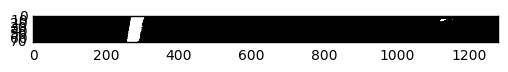

In [800]:
plt.imshow(imageFrac[9], cmap='gray')
peaks = find_peaks_cwt(np.sum(imageFrac[9], axis=0), np.arange(200, 300))
peaks

In [801]:
lPoints[breaks-1], rPoints[breaks-1]

(281, 1127)

In [494]:
histogram = np.sum(im[int(im.shape[0]/2):,:], axis=0)
peaks = find_peaks_cwt(histogram, np.arange(200, 300))
print(peaks)


lPoints[breaks-1], rPoints[breaks-1] = peaks[0], peaks[-1]


for i in range(breaks-2, -1, -1):
    if lPoints[i] == None:
        lPoints[i] = lPoints[i+1]

    if rPoints[i] == None:
        rPoints[i] = rPoints[i+1]

[344, 1017]


In [805]:
lPoints = np.array([x for x in lPoints if x != None])
rPoints = np.array([x for x in rPoints if x != None]) + (im.shape[1]/ 2) + 30

lNone = [i for i, e in enumerate(lPoints) if e != None]
rNone = [i for i, e in enumerate(rPoints) if e != None]

In [810]:
rPoints

array([ 1818.,  1803.,  1800.,  1794.,  1792.,  1797.])

In [16]:

def moveWin(lastFound, width, d=0):
    output = None
    if d==0:
        output = lastFound - width
    else:
        output = lastFound + width
    
    if output < 0 or output >= 600:
        output = lastFound
        
    return output

def hSlice(image):
    return image[:, 0: int(image.shape[1] / 2)], image[:, int(image.shape[1] / 2): image.shape[1]]

def vSlice(image, breaks=10):
    slices = []
    ratio = int(image.shape[0]/breaks)
    for i in range(breaks):
        slices.append(image[ratio*i:(i+1)*ratio])
    return slices

def detect_lane(image, breaks=10):
    
    hslice = hSlice(image)
    
    histogram = np.sum(hslice[0][int(hslice[0].shape[0]/2):,:], axis=0)
    lpeaks = find_peaks_cwt(histogram, np.arange(1, 800))[0]

    histogram = np.sum(hslice[1][int(hslice[1].shape[0]/2):,:], axis=0)
    rpeaks = find_peaks_cwt(histogram, np.arange(1, 800))
    
    if rpeaks:
        rpeaks = rpeaks[0]
    else:
        histogram = np.sum(hslice[1][:,:], axis=0)
        rpeaks = find_peaks_cwt(histogram, np.arange(1, 800))[0]

    points = {}
    points[0], points[1] = [], []
    
    width = 300
    
    lastFound = None
    
    for each in range(2):
        
        vslices = vSlice(hslice[each], breaks=breaks)
        
        if each == 0:
            points[each].append(lpeaks)
            lastFound = lpeaks
        else:
            points[each].append(rpeaks)
            lastFound = rpeaks
            
        for i in range(breaks-2, -1, -1):
            im = vslices[i]

            histogram = np.sum(im[:,moveWin(lastFound, width, d=0): moveWin(lastFound, width, d=1)], axis=0)
            peaks = find_peaks_cwt(histogram, np.arange(1, 100))


            points[each].append(peaks[0] + moveWin(lastFound, width, d=0) if peaks else None)

            if peaks:
                #print(peaks[0])
                lastFound = peaks[0]

    return points
    
            
        

In [1]:
def moveWin(lastFound, width, d=0):
    output = None
    if d==0:
        output = lastFound - width
        if output < 0:
            output = 0
    else:
        output = lastFound + width
        if output >= 640:
            output = 640
    
    return output

def hSlice(image):
    return image[:, 0: int(image.shape[1] / 2)], image[:, int(image.shape[1] / 2): image.shape[1]]

def vSlice(image, breaks=10):
    slices = []
    ratio = int(image.shape[0]/breaks)
    for i in range(breaks):
        slices.append(image[ratio*i:(i+1)*ratio])
    return slices

def detect_lane(image, breaks=10):
    
    hslice = hSlice(image)
    
    histogram = np.sum(hslice[0][int(hslice[0].shape[0]/2):,:], axis=0)
    lpeaks = np.argmax(histogram)
    
    histogram = np.sum(hslice[1][int(hslice[1].shape[0]/2):,:], axis=0)
    rpeaks = np.argmax(histogram)

    points = {}
    points[0], points[1] = [], []
    
    width = 300
    
    lastFound = None
    
    for each in range(2):
        
        vslices = vSlice(hslice[each], breaks=breaks)
        
        if each == 0:
            points[each].append(lpeaks)
            lastFound = lpeaks
        else:
            points[each].append(rpeaks)
            lastFound = rpeaks
            
        for i in range(breaks-2, -1, -1):
            im = vslices[i]

            histogram = np.sum(im[:,moveWin(lastFound, width, d=0): moveWin(lastFound, width, d=1)], axis=0)
            peaks = np.argmax(histogram)


            points[each].append(peaks + moveWin(lastFound, width, d=0) if peaks else None)

            if peaks:
                #print(peaks[0])
                lastFound = peaks

    return points
    
            
        

In [2]:
def detect_noSlide(im, breaks, fits):
    
    
    sliding = False
    
    points = {}
    points[0], points[1] = [], []
    
    slices = vSlice(im, breaks=breaks)
    width = 50
    for each in [0, 1]:
        for i in range(breaks-1, -1, -1):
            imslice = slices[i]
            histogram = np.sum(imslice[:,int(moveWinNoSlide(fits[each][i], width, d=0)): int(moveWinNoSlide(fits[each][i], width, d=1))], axis=0)

                
            peaks = np.argmax(histogram) if histogram.tolist() != [] else 0

            
            points[each].append(peaks+ (fits[each][i] - width))
            
    if len(points[0]) < 3 or len(points[1]) < 3:
        points = detect_lane(im)
            
    return points

def processNoSlide(points):

    lPoints = np.array([x for x in points[0] if x != 0])
    rPoints = np.array([x for x in points[1] if x != 0])

    lNone = [i for i, e in enumerate(points[0]) if e != 0]
    rNone = [i for i, e in enumerate(points[1]) if e != 0]
    
    return lPoints, rPoints, lNone, rNone

def moveWinNoSlide(center, width, d=0):
    output = None
    if d==0:
        output = center - width
        if output <= 0:
            output = 0
    else:
        output = center + width
        if output >= 1200:
            output = 1200
    
    return output

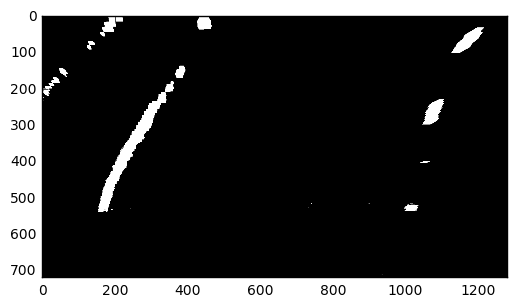

In [18]:
image = mpimg.imread(os.path.join("newpics", "555.jpg"))

image = mpimg.imread(os.path.join("newpics", "1048.jpg"))


im = warp(combined_threshold(one))
plt.imshow(im, cmap='gray')

In [281]:
im.shape

(720, 1280)

In [22]:
one = mpimg.imread(os.path.join("newpics", "555.jpg"))
two = mpimg.imread(os.path.join("newpics", "501.jpg"))


In [360]:
def det(im, breaks, fits):
    points = {}
    points[0], points[1] = [], []
    
    slices = vSlice(im, breaks=breaks)
    width = 80
    for each in [0, 1]:
        for i in range(breaks-1, -1, -1):
            imslice = slices[i]
            histogram = np.sum(imslice[:,int(fits[each][i]-width): int(fits[each][i] + width)], axis=0)
            peaks = np.argmax(histogram)
            
            points[each].append(peaks + (fits[each][i] - width))
            
    return points

In [223]:
points = {}
points[0], points[1] = [], []

slices = vSlice(warp(combined_threshold(one)), breaks=breaks)
fits = [left_fitx, right_fitx]

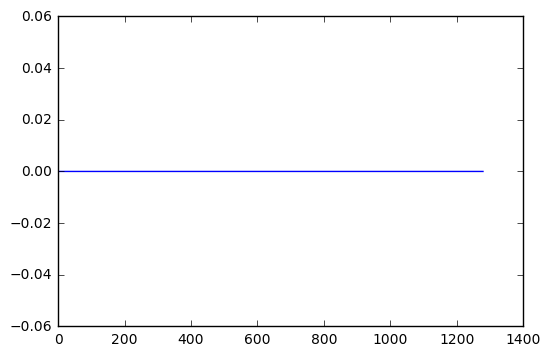

In [253]:
right_fitx[5]
histogram = np.sum(slices[5][1156 - 100:1156 + 100, :], axis=0)
plt.plot(histogram)

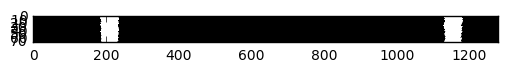

In [247]:
plt.imshow(slices[5], cmap='gray')

In [229]:
histogram = np.sum(slices[i][fits[0][0] - 200:fits[0][0] + 200, :], axis=0)

C:\Users\sijuade\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [234]:

width = 300
for each in [0, 1]:
    for i in range(breaks-1, -1, -1):
        histogram = np.sum(slices[i][fits[each][i] - width:fits[each][i] + width, :], axis=0)
        peaks = np.argmax(histogram)

        points[each].append(peaks)

C:\Users\sijuade\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [56]:
im = warp(combined_threshold(one))


In [19]:
breaks = 10
points = detect_lane(im, breaks=breaks)

lPoints = np.array([x for x in points[0] if x != None])
rPoints = np.array([x for x in points[1] if x != None]) + int(im.shape[1] / 2) + 15

lNone = [i for i, e in enumerate(points[0]) if e != None]
rNone = [i for i, e in enumerate(points[1]) if e != None]

In [20]:
lPoints, rPoints

(array([178, 161, 188, 219, 269, 303, 377, 131, 184], dtype=int64),
 array([1028, 1028, 1032, 1064, 1068, 1102, 1161, 1204], dtype=int64))

In [78]:
pseudopoints = detect_noSlide(warp(combined_threshold(thirtysix)), breaks, [left_fitx, right_fitx])

lPoints = np.array([x for x in pseudopoints[0] if x != 0])
rPoints = np.array([x for x in pseudopoints[1] if x != 0]) #+ int(im.shape[1] / 2) + 15

lNone = [i for i, e in enumerate(pseudopoints[0]) if e != 0]
rNone = [i for i, e in enumerate(pseudopoints[1]) if e != 0]

In [79]:
pseudopoints

{0: [110.11016042780724,
  131.96557168321857,
  149.1247771836006,
  191.5877769289533,
  245.35457091927674,
  271.42515915457085,
  170.79954163483566,
  164.47771836007118,
  153.45968933027737,
  137.74545454545427],
 1: [989.33195143618514,
  999.37853406094382,
  1001.6115952451453,
  996.03113498878952,
  990.6371532918763,
  1004.4296501544057,
  1030.408625576378,
  895.57407955779274,
  850.92601209865029,
  798.4644231989505]}

In [21]:
x = float(image.shape[0] / breaks)
yvals = np.linspace(0, breaks, num=breaks)* x
yvals = yvals[::-1]

leftYvals = yvals[lNone]
left_fit = np.polyfit(leftYvals, lPoints, 2)
left_fitx = left_fit[0]*yvals**2 + left_fit[1]*yvals + left_fit[2]

rightYvals = yvals[rNone]
right_fit = np.polyfit(rightYvals, rPoints, 2)
right_fitx = right_fit[0]*yvals**2 + right_fit[1]*yvals + right_fit[2]

y_eval = np.max(yvals)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) \
                             /np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) \
                                /np.absolute(2*right_fit[0])

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(leftYvals*ym_per_pix, lPoints*xm_per_pix, 2)
right_fit_cr = np.polyfit(rightYvals*ym_per_pix, rPoints*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])

In [37]:
left_fit, right_fit

(array([ -6.98230997e-04,   4.10032468e-01,   1.98209091e+02]),
 array([  4.01751584e-04,  -5.35274683e-01,   1.20347706e+03]))

In [27]:
right_fitx

array([ 1026.34731324,  1025.4587156 ,  1029.71253823,  1039.10878113,
        1053.6474443 ,  1073.32852774,  1098.15203145,  1128.11795544,
        1163.22629969,  1203.47706422])

In [35]:
[left_fitx, right_fitx][0][11]

IndexError: index 11 is out of bounds for axis 0 with size 10

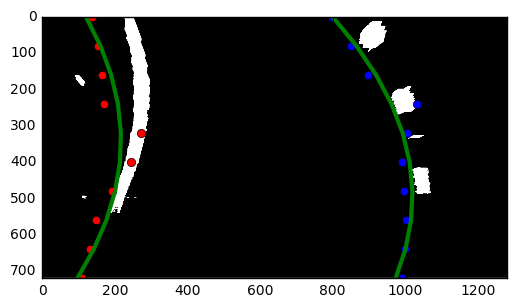

In [81]:
plt.plot(lPoints, leftYvals, 'o', color='red')
plt.plot(rPoints, rightYvals, 'o', color='blue')
plt.imshow(warp(combined_threshold(two)), cmap='gray') 
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, yvals, color='green', linewidth=3)
plt.plot(right_fitx, yvals, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [55]:
imageD = undistort(one)
Minv = cv2.getPerspectiveTransform(dst, src)

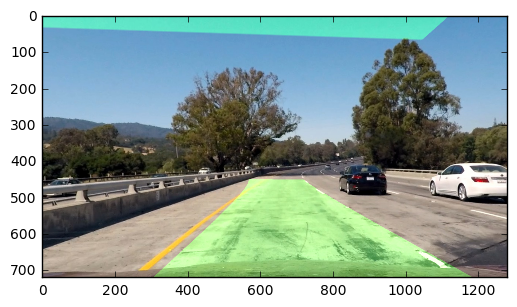

In [56]:
warp_zero = np.zeros_like(im).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(imageD, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [233]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [95]:
np.array([np.array([1, 2, 3, 4, 5, 6, 5]), np.array([1, 2, 3, 3, 3, 3, 4])]).mean(0)

array([ 1. ,  2. ,  3. ,  3.5,  4. ,  4.5,  4.5])

In [51]:
test = True

In [52]:
t = 10 + (10 if test else 0)

In [53]:
t

20